<a href="https://colab.research.google.com/github/Anas10202/mastercard_fraud_detection/blob/main/Mastercard1_CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
import xgboost as xgb

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score, PrecisionRecallDisplay


In [66]:
df = pd.read_csv('fraudTrain.csv')



In [67]:
df.shape

(1296675, 23)

## **Exploratory Data Analysis (EDA)**

In [68]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [69]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [70]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [71]:
df.isnull().sum()


,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [72]:
df_fraudulent = df[df['is_fraud'] == 1]
df_fraudulent.head(20)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1
2937,2937,2019-01-02 13:38:08,4613314721966,fraud_Medhurst PLC,shopping_net,844.80,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,248c2746e78f2ec713df51254ff1b302,1325511488,35.987802,-81.254332,1
3527,3527,2019-01-02 23:52:08,4613314721966,fraud_Ruecker Group,misc_net,843.91,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,2f7d497f607396ab669c14c2abe3886f,1325548328,35.985612,-81.383306,1
3580,3580,2019-01-03 01:05:27,340187018810220,fraud_Conroy-Cruickshank,gas_transport,10.76,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,0a2f8002e55a3565c5c88d8cf039fed8,1325552727,28.856712,-97.794207,1
3600,3600,2019-01-03 01:35:52,340187018810220,fraud_Koepp-Parker,grocery_pos,332.35,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,97903213a2fd7e53bbaa60807144a505,1325554552,29.320662,-97.937219,1
3671,3671,2019-01-03 03:17:36,340187018810220,fraud_Strosin-Cruickshank,grocery_pos,315.34,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,0ffc2b7dae4c33883f14ac60283d4027,1325560656,28.953283,-97.806528,1


In [73]:
df = df.drop(columns=['Unnamed: 0'])


The 'Unnamed: 0' column consists of the row number of each credit card transaction entry.

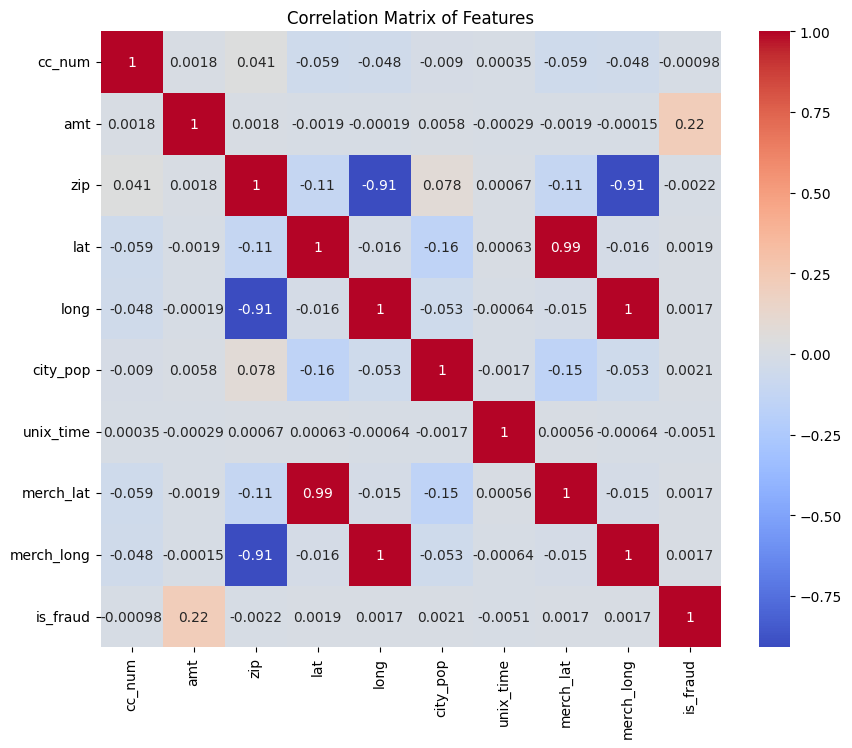

In [74]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

This image shows a correlation matrix heatmap for numerical features in a dataset. Strong positive correlations are shown in deep red, while strong negative correlations appear in dark blue. Key features include amt (amount), zip, lat, long, and is_fraud, with a notable positive correlation between amt and is_fraud (0.22), **suggesting that higher transaction amounts may have some association with fraud. **

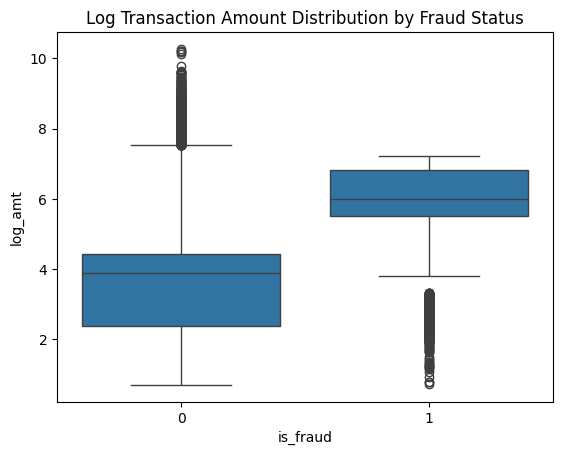

In [75]:
df['log_amt'] = np.log1p(df['amt'])
sns.boxplot(x='is_fraud', y='log_amt', data=df)
plt.title('Log Transaction Amount Distribution by Fraud Status')
plt.show()


Fraudulent transactions tend to involve higher amounts when compared to non-fraudulent ones, which aligns with the earlier correlation matrix analysis showing a moderate positive correlation between transaction amount (amt) and fraud (is_fraud).

In [76]:
'''
features = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']
for feature in features:
    plt.figure(figsize=(10, 8))
    sns.histplot(data=df, x=feature, hue='is_fraud', multiple='stack', kde=True)
    plt.title(f'Distribution of {feature} by Fraud Status')
    plt.show()
'''

"\nfeatures = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']\nfor feature in features:\n    plt.figure(figsize=(10, 8))\n    sns.histplot(data=df, x=feature, hue='is_fraud', multiple='stack', kde=True)\n    plt.title(f'Distribution of {feature} by Fraud Status')\n    plt.show()\n"

## **Data Cleaning**


In [77]:
df = df.drop(columns=['cc_num', 'Unnamed: 0', 'gender'], errors='ignore')

In [78]:
print(df.isnull().sum())


trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
log_amt                  0
dtype: int64


Since there are no null values, we can conclude there are no missing values in the data set.

In [79]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['month'] = df['trans_date_trans_time'].dt.month


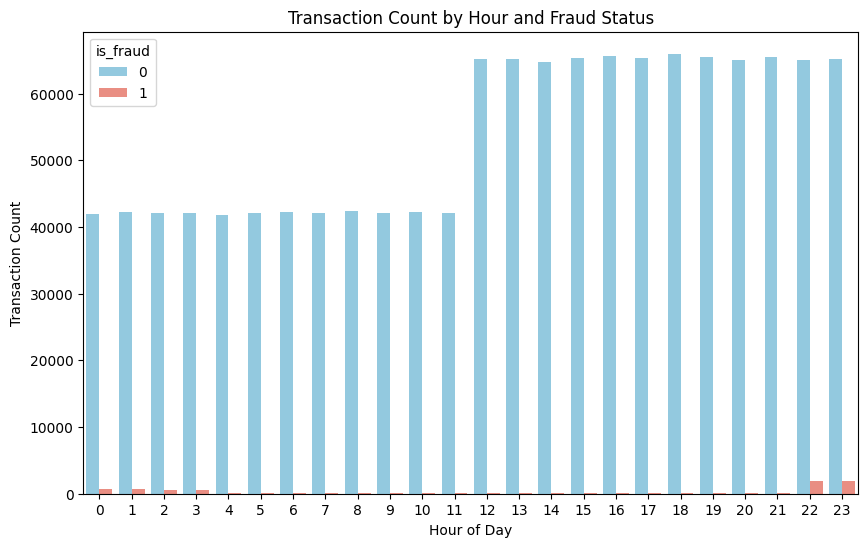

In [80]:
df['transaction_hour'] = pd.to_datetime(df['trans_date_trans_time']).dt.hour
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='transaction_hour', hue='is_fraud', palette=['skyblue', 'salmon'])
plt.title('Transaction Count by Hour and Fraud Status')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Count')
plt.show()

This graph shows the transaction amount by hour of day. This helps us see how much money is being spent at what time of the day. This also shows the imbalance in our dataset.

In [81]:
df['unique_id'] = df['first'] + '_' + df['last'] + '_' + df['street']


unique_id: Combines 'first', 'last', and 'street' to create a unique identifier for individuals.


In [82]:
df['transaction_count'] = df.groupby('unique_id')['unique_id'].transform('count')


transaction_count: Counts how many transactions are associated with each individual.


In [83]:
df['fraudulent_transaction_count'] = df.groupby('unique_id')['is_fraud'].transform('sum')


fraudulent_transaction_count: Counts how many fraudulent transactions are associated with each individual.

In [84]:
df['multiple_fraud_flag'] = df['fraudulent_transaction_count'] >= 1


multiple_fraud_flag: A binary feature to flag individuals with more than one fraudulent transaction.

In [85]:
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year


From date of birth (dob), we can derive a feature called 'age' to avoid using personal identifiable information.

In [86]:
# df = pd.get_dummies(df, columns=['city', 'state', 'job'], drop_first=True)


In [87]:
df = df.drop(columns=['first', 'last', 'street', 'trans_num', 'dob'])


In addition, we will drop features that involve personal identifiable information, such as 'first' and 'last' (name), 'street' (address), and 'dob'. We will also remove 'trans_num', since that will be unique for each transaction and should not add any predictive power in regards to predicting credit card fraud.

In [88]:
fraud_distribution = df['is_fraud'].value_counts(normalize=True) * 100
print(fraud_distribution)


is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64


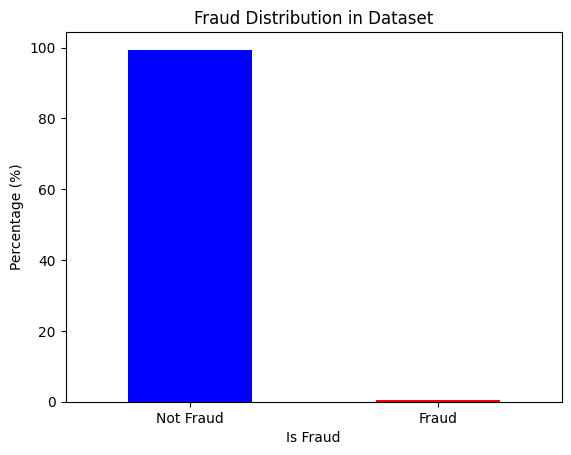

In [89]:
fraud_distribution.plot(kind='bar', color=['blue', 'red'])
plt.title('Fraud Distribution in Dataset')
plt.xlabel('Is Fraud')
plt.ylabel('Percentage (%)')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'], rotation=0)
plt.show()

As can be seen, this data set is highly disproportional, with a majority of the transactions being non-fraudulent and less than 1% being fraudulent.

In [90]:
df = df.sort_values(by=['unique_id', 'trans_date_trans_time'])
df['cumsum_amt'] = df.groupby('unique_id')['amt'].cumsum()
df['prev_cumsum_amt'] = df.groupby('unique_id')['cumsum_amt'].shift(1)


Here we are sorting the data by customer through the derived unique IDs and transaction time to ensure calculations occur in the correct order.

We also calculate the running total of how much each customer has spent over time.

Then, we shift this cumulative total to capture how much the customer had spent before the current transaction.

In [91]:
df['trans_7d_count'] = df.groupby('unique_id').cumcount() + 1
df['prev_trans_count'] = df.groupby('unique_id')['trans_7d_count'].shift(1)
df[['trans_date_trans_time', 'amt', 'trans_7d_count', 'prev_trans_count']].head()


,trans_date_trans_time,amt,trans_7d_count,prev_trans_count
84,2019-01-01 01:02:16,89.11,1,NaN
589,2019-01-01 07:39:00,68.85,2,1.0
954,2019-01-01 12:04:54,47.96,3,2.0
1070,2019-01-01 13:14:46,77.51,4,3.0
1715,2019-01-01 18:14:30,461.28,5,4.0


We created a running transaction count (trans_7d_count) for each customer and shifted the transaction count by one to capture how many transactions occurred before the current transaction.

In [92]:
df['amt_7d_sum'] = df.groupby('unique_id')['amt'].rolling(window=7, min_periods=1).sum().reset_index(level=0, drop=True)
df['prev_trans_count'].fillna(0, inplace=True)
df['spending_velocity'] = df['amt_7d_sum'] / df['prev_trans_count']
df['spending_velocity'].fillna(0, inplace=True)

<ipython-input-92-e5de1a7a5588>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['prev_trans_count'].fillna(0, inplace=True)
<ipython-input-92-e5de1a7a5588>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Spending velocity (spending_velocity) measures the average amount spent per transaction over a recent time window (7 days in this case). It is a useful feature to detect abnormal spending behavior, which might indicate potential fraud.

In [93]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'log_amt', 'hour', 'day_of_week', 'month',
       'transaction_hour', 'unique_id', 'transaction_count',
       'fraudulent_transaction_count', 'multiple_fraud_flag', 'age',
       'cumsum_amt', 'prev_cumsum_amt', 'trans_7d_count', 'prev_trans_count',
       'amt_7d_sum', 'spending_velocity'],
      dtype='object')

In [94]:
# def calculate_distance(row):
#     customer_location = (row['lat'], row['long'])
#     merchant_location = (row['merch_lat'], row['merch_long'])

#     # Check if any of the coordinates are NaN
#     if np.isnan(customer_location).any() or np.isnan(merchant_location).any():
#         return np.nan  # Return NaN if any of the coordinates are missing
#     else:
#         return geodesic(customer_location, merchant_location).kilometers


In [95]:
# # Apply the function to each row in the DataFrame and store the result in a new 'distance' column
# df['distance'] = df.apply(calculate_distance, axis=1)

# # Display the first few rows of the DataFrame with the latitude, longitude, merchant's coordinates, and the calculated distance
# df[['lat', 'long', 'merch_lat', 'merch_long', 'distance']].head()

In [96]:
def calculate_distance_vectorized(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371
    return c * r

df['distance'] = calculate_distance_vectorized(df['lat'], df['long'], df['merch_lat'], df['merch_long'])
df[['lat', 'long', 'merch_lat', 'merch_long', 'distance']].head()

,lat,long,merch_lat,merch_long,distance
84,39.7795,-93.3014,40.773306,-92.821257,117.773649
589,39.7795,-93.3014,38.795002,-94.219522,135.007305
954,39.7795,-93.3014,39.206677,-93.033773,67.708392
1070,39.7795,-93.3014,40.759427,-93.539051,110.812606
1715,39.7795,-93.3014,39.656496,-92.400368,78.270114


We created a new feature that calculates the distance between the customer and the merchant for each transaction. Using the `geodesic()` function from the `geopy` library, we computed the distance in kilometers based on the latitude and longitude of both the customer and merchant. This was applied row-by-row to the DataFrame, and the resulting distances were stored in a new column, `distance`. This feature helps detect potentially fraudulent transactions that occur far from the customer's typical location.

In [97]:
df['fraud_7d_flag'] = df.groupby('unique_id')['is_fraud'].apply(
    lambda x: x.rolling(window=7, min_periods=1).sum()
).reset_index(level=0, drop=True)
df['fraud_7d_flag'] = df['fraud_7d_flag'].apply(lambda x: 1 if x > 0 else 0)
df[['trans_date_trans_time', 'is_fraud', 'fraud_7d_flag']].head()


,trans_date_trans_time,is_fraud,fraud_7d_flag
84,2019-01-01 01:02:16,0,0
589,2019-01-01 07:39:00,0,0
954,2019-01-01 12:04:54,0,0
1070,2019-01-01 13:14:46,0,0
1715,2019-01-01 18:14:30,0,0


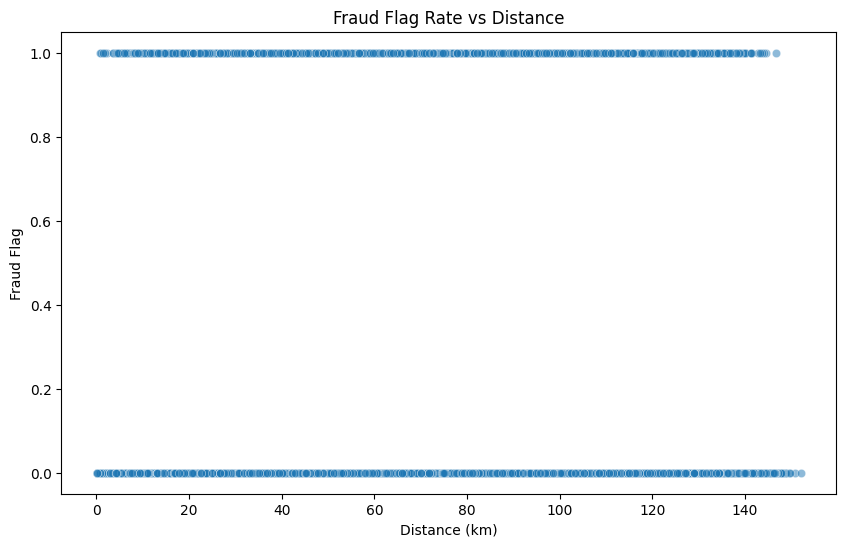

In [98]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='fraud_7d_flag', data=df, alpha=0.5)
plt.title("Fraud Flag Rate vs Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Fraud Flag")
plt.show()


In this code, we created a new feature, `fraud_7d_flag`, to track whether a customer has committed any fraudulent transactions in the past 7 days. First, we used a rolling window of 7 days within each customer group to sum the fraudulent transactions. Then, we converted this sum into a binary flag, where `1` indicates at least one fraud within the past 7 days and `0` indicates none. The resulting feature helps to identify customers with recent fraudulent activity, which can be useful for detecting suspicious patterns.

In [99]:
df = df.drop(columns=['zip'])

In [100]:
print(df.isnull().sum())
df.dropna(subset=['prev_trans_count'], inplace=True)
print(df.isnull().sum())

trans_date_trans_time             0
merchant                          0
category                          0
amt                               0
city                              0
state                             0
lat                               0
long                              0
city_pop                          0
job                               0
unix_time                         0
merch_lat                         0
merch_long                        0
is_fraud                          0
log_amt                           0
hour                              0
day_of_week                       0
month                             0
transaction_hour                  0
unique_id                         0
transaction_count                 0
fraudulent_transaction_count      0
multiple_fraud_flag               0
age                               0
cumsum_amt                        0
prev_cumsum_amt                 983
trans_7d_count                    0
prev_trans_count            

In [101]:
# Dropping any remaining unnecessary columns
df = df.drop(columns=[
    'cc_num', 'Unnamed', 'gender',
    'first', 'last', 'street',
    'trans_num', 'dob',
    'zip','merch_lat', 'merch_long',
    'city', 'state', 'job','hour', 'day_of_week', 'month','lat','long'
], errors='ignore')

# Checking for any remaining object-type columns that might not be needed
remaining_object_cols = df.select_dtypes(include=['object']).columns
print("Remaining object columns:", remaining_object_cols)

# Dropping any remaining object columns if they are still present
df = df.drop(columns=remaining_object_cols, errors='ignore')

# Final check to ensure no unwanted columns remain
df.info()

Remaining object columns: Index(['merchant', 'category', 'unique_id'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 84 to 1293360
Data columns (total 19 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   trans_date_trans_time         1296675 non-null  datetime64[ns]
 1   amt                           1296675 non-null  float64       
 2   city_pop                      1296675 non-null  int64         
 3   unix_time                     1296675 non-null  int64         
 4   is_fraud                      1296675 non-null  int64         
 5   log_amt                       1296675 non-null  float64       
 6   transaction_hour              1296675 non-null  int32         
 7   transaction_count             1296675 non-null  int64         
 8   fraudulent_transaction_count  1296675 non-null  int64         
 9   multiple_fraud_flag           1296675 non-null  boo

In [102]:
df.head()

,trans_date_trans_time,amt,city_pop,unix_time,is_fraud,log_amt,transaction_hour,transaction_count,fraudulent_transaction_count,multiple_fraud_flag,age,cumsum_amt,prev_cumsum_amt,trans_7d_count,prev_trans_count,amt_7d_sum,spending_velocity,distance,fraud_7d_flag
84,2019-01-01 01:02:16,89.11,964,1325379736,0,4.501031,1,2050,8,True,45,89.11,NaN,1,0.0,89.11,inf,117.773649,0
589,2019-01-01 07:39:00,68.85,964,1325403540,0,4.246350,7,2050,8,True,45,157.96,89.11,2,1.0,157.96,157.960000,135.007305,0
954,2019-01-01 12:04:54,47.96,964,1325419494,0,3.891004,12,2050,8,True,45,205.92,157.96,3,2.0,205.92,102.960000,67.708392,0
1070,2019-01-01 13:14:46,77.51,964,1325423686,0,4.363226,13,2050,8,True,45,283.43,205.92,4,3.0,283.43,94.476667,110.812606,0
1715,2019-01-01 18:14:30,461.28,964,1325441670,0,6.136171,18,2050,8,True,45,744.71,283.43,5,4.0,744.71,186.177500,78.270114,0


In [103]:
df.columns

Index(['trans_date_trans_time', 'amt', 'city_pop', 'unix_time', 'is_fraud',
       'log_amt', 'transaction_hour', 'transaction_count',
       'fraudulent_transaction_count', 'multiple_fraud_flag', 'age',
       'cumsum_amt', 'prev_cumsum_amt', 'trans_7d_count', 'prev_trans_count',
       'amt_7d_sum', 'spending_velocity', 'distance', 'fraud_7d_flag'],
      dtype='object')

In [104]:
datetime_cols = df.select_dtypes(include=['datetime', 'datetimetz']).columns
print(f"Datetime columns: {datetime_cols}")


Datetime columns: Index(['trans_date_trans_time'], dtype='object')


In [105]:
for col in datetime_cols:
    df[col] = df[col].astype('int64') // 10**9  # Convert to Unix timestamp

In [106]:
# X = X.drop(columns=datetime_cols, errors='ignore')

In [107]:
# remaining_object_cols = df.select_dtypes(include=['object']).columns
# print("Remaining object columns in X_train:", remaining_object_cols)

In [108]:
df.head()

,trans_date_trans_time,amt,city_pop,unix_time,is_fraud,log_amt,transaction_hour,transaction_count,fraudulent_transaction_count,multiple_fraud_flag,age,cumsum_amt,prev_cumsum_amt,trans_7d_count,prev_trans_count,amt_7d_sum,spending_velocity,distance,fraud_7d_flag
84,1546304536,89.11,964,1325379736,0,4.501031,1,2050,8,True,45,89.11,NaN,1,0.0,89.11,inf,117.773649,0
589,1546328340,68.85,964,1325403540,0,4.246350,7,2050,8,True,45,157.96,89.11,2,1.0,157.96,157.960000,135.007305,0
954,1546344294,47.96,964,1325419494,0,3.891004,12,2050,8,True,45,205.92,157.96,3,2.0,205.92,102.960000,67.708392,0
1070,1546348486,77.51,964,1325423686,0,4.363226,13,2050,8,True,45,283.43,205.92,4,3.0,283.43,94.476667,110.812606,0
1715,1546366470,461.28,964,1325441670,0,6.136171,18,2050,8,True,45,744.71,283.43,5,4.0,744.71,186.177500,78.270114,0


In [109]:
y = df['is_fraud']
y.dropna(inplace=True)


In [110]:
X = df.drop(columns=['is_fraud'])
print(X.isnull().sum())
X.dropna(inplace=True)

trans_date_trans_time             0
amt                               0
city_pop                          0
unix_time                         0
log_amt                           0
transaction_hour                  0
transaction_count                 0
fraudulent_transaction_count      0
multiple_fraud_flag               0
age                               0
cumsum_amt                        0
prev_cumsum_amt                 983
trans_7d_count                    0
prev_trans_count                  0
amt_7d_sum                        0
spending_velocity                 0
distance                          0
fraud_7d_flag                     0
dtype: int64


In [111]:
X, y = X.align(y, join='inner', axis=0)

print(X.shape, y.shape)


(1295692, 18) (1295692,)


# Data Preparation

In [112]:
X_original, X_prep, y_original, y_prep = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [113]:
print("Resampled X shape:", X_original.shape)
print("Resampled y shape:", y_original.shape)
print("Resampled X shape:", X_prep.shape)
print("Resampled y shape:", y_prep.shape)

Resampled X shape: (1036553, 18)
Resampled y shape: (1036553,)
Resampled X shape: (259139, 18)
Resampled y shape: (259139,)


In [114]:
from imblearn.over_sampling import SMOTE
ros=SMOTE(sampling_strategy=0.3,random_state=42)
# Apply SMOTE to the feature matrix X and target vector y
# This resamples the minority class to have the same number of samples as the majority class
X_resampled, y_resampled = ros.fit_resample(X_prep, y_prep)
print("Resampled X shape:", X_resampled.shape)
print("Resampled y shape:", y_resampled.shape)

Resampled X shape: (334948, 18)
Resampled y shape: (334948,)


After resampling, X now has 2,576,522 rows and 17 columns.
The target vector y also has 2,576,522 entries, matching the balanced class distribution

In [115]:
print("Original dataset class distribution:", np.bincount(y))
print("Resampled dataset class distribution:", np.bincount(y_resampled))


Original dataset class distribution: [1288261    7431]
Resampled dataset class distribution: [257653  77295]


The original dataset was highly imbalanced, with 1,288,261 samples of class 0 and only 7,431 samples of class 1.
After resampling, the dataset is balanced, with both classes having 1,288,261 samples.

In [116]:
X_resampled.head()

,trans_date_trans_time,amt,city_pop,unix_time,log_amt,transaction_hour,transaction_count,fraudulent_transaction_count,multiple_fraud_flag,age,cumsum_amt,prev_cumsum_amt,trans_7d_count,prev_trans_count,amt_7d_sum,spending_velocity,distance,fraud_7d_flag
0,1548840442,86.05,1563,1327915642,4.466483,9,2555,8,True,41,5365.72,5279.67,112,111.0,334.62,3.014595,80.517954,0
1,1560537378,7.89,910148,1339698978,2.184927,18,3032,6,True,44,69771.17,69763.28,824,823.0,322.18,0.391470,59.919464,0
2,1576783460,4.37,817312,1355945060,1.680828,19,1571,0,False,15,51900.54,51896.17,1048,1047.0,241.23,0.230401,58.193834,0
3,1556799102,55.51,2328,1335960702,4.034418,12,2063,12,True,77,21042.64,20987.13,378,377.0,331.74,0.879947,29.243211,0
4,1555856823,8.03,917,1335018423,2.200552,14,502,9,True,24,7215.09,7207.06,80,79.0,309.05,3.912025,97.305799,0


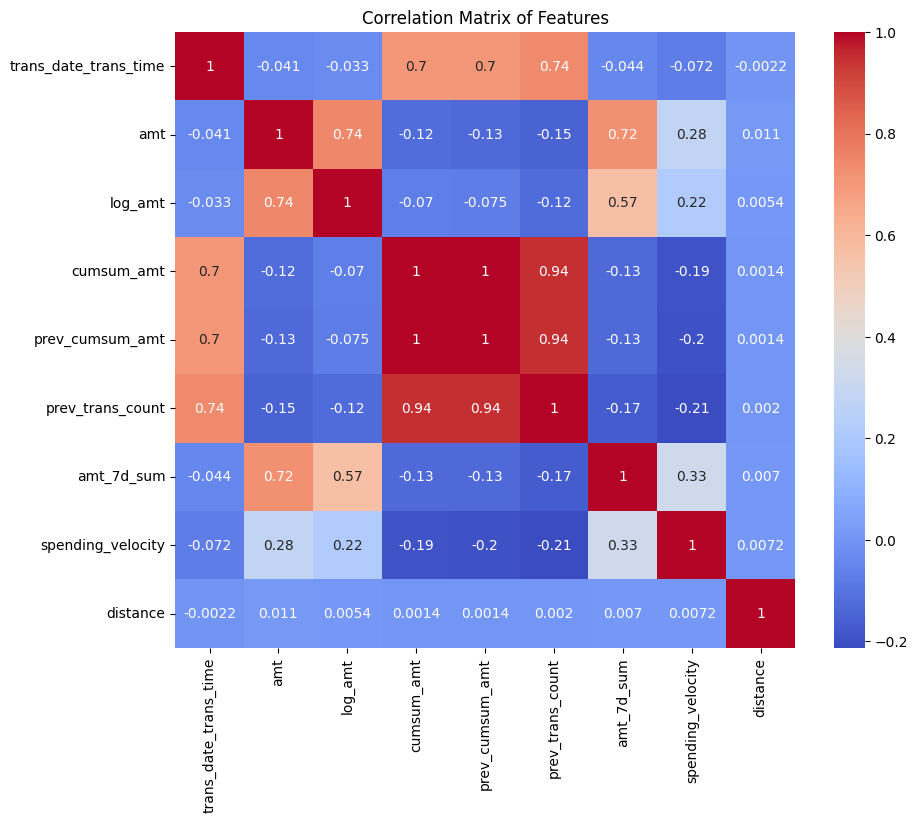

In [117]:
numeric_df = X_resampled.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

This correlation matrix heatmap shows relationships between transaction features in the resampled dataset. High correlations appear among cumsum_amt, prev_cumsum_amt, and prev_trans_count, indicating these may capture cumulative transaction patterns. amt is also strongly correlated with log_amt and amt_7d_sum, suggesting related metrics of transaction amounts.


In [118]:
X_original = X_original.drop(['trans_date_trans_time', 'unix_time', 'fraudulent_transaction_count', 'multiple_fraud_flag',
                      'cumsum_amt', 'prev_cumsum_amt'], axis=1)
X_original.head()

,amt,city_pop,log_amt,transaction_hour,transaction_count,age,trans_7d_count,prev_trans_count,amt_7d_sum,spending_velocity,distance,fraud_7d_flag
1114883,6.82,106,2.056685,17,2051,37,1758,1757.0,323.74,0.184257,7.201955,0
821143,57.23,2906700,4.064401,22,2558,35,1633,1632.0,455.55,0.279136,96.755996,0
765612,40.77,3096,3.732178,3,1540,44,914,913.0,186.11,0.203844,87.282993,0
916535,74.12,1514,4.319087,3,504,53,345,344.0,586.88,1.706047,62.026139,0
304847,3.28,93193,1.453953,21,1538,24,369,368.0,403.41,1.096223,69.905030,0


In [119]:
X_original.columns

Index(['amt', 'city_pop', 'log_amt', 'transaction_hour', 'transaction_count',
       'age', 'trans_7d_count', 'prev_trans_count', 'amt_7d_sum',
       'spending_velocity', 'distance', 'fraud_7d_flag'],
      dtype='object')

In [120]:
y_original.head()

,is_fraud
1114883,0
821143,0
765612,0
916535,0
304847,0


In [121]:
original_distribution = y_original.value_counts(normalize=True) * 100
print("Resampled dataset class distribution (percentage):")
print(original_distribution)

Resampled dataset class distribution (percentage):
is_fraud
0    99.426464
1     0.573536
Name: proportion, dtype: float64


In [122]:
X_resampled = X_resampled.drop(['trans_date_trans_time', 'unix_time', 'fraudulent_transaction_count', 'multiple_fraud_flag',
                      'cumsum_amt', 'prev_cumsum_amt'], axis=1)
X_resampled.head()

,amt,city_pop,log_amt,transaction_hour,transaction_count,age,trans_7d_count,prev_trans_count,amt_7d_sum,spending_velocity,distance,fraud_7d_flag
0,86.05,1563,4.466483,9,2555,41,112,111.0,334.62,3.014595,80.517954,0
1,7.89,910148,2.184927,18,3032,44,824,823.0,322.18,0.391470,59.919464,0
2,4.37,817312,1.680828,19,1571,15,1048,1047.0,241.23,0.230401,58.193834,0
3,55.51,2328,4.034418,12,2063,77,378,377.0,331.74,0.879947,29.243211,0
4,8.03,917,2.200552,14,502,24,80,79.0,309.05,3.912025,97.305799,0


In [123]:
X_resampled.columns

Index(['amt', 'city_pop', 'log_amt', 'transaction_hour', 'transaction_count',
       'age', 'trans_7d_count', 'prev_trans_count', 'amt_7d_sum',
       'spending_velocity', 'distance', 'fraud_7d_flag'],
      dtype='object')

In [124]:
y_resampled.head()

,is_fraud
0,0
1,0
2,0
3,0
4,0


In [125]:
resampled_distribution = y_resampled.value_counts(normalize=True) * 100
print("Resampled dataset class distribution (percentage):")
print(resampled_distribution)

Resampled dataset class distribution (percentage):
is_fraud
0    76.923284
1    23.076716
Name: proportion, dtype: float64


This resampled dataset is now evenly split. 50% is fraud and 50% is not fraud

# Data Modeling

Logistic Regression Model

In [126]:
# Assuming X and y are already defined as per your previous steps
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
scaler = StandardScaler()
# Initialize logistic regression model
lr_model = LogisticRegression(max_iter=1000,penalty='l2', C=0.01)  # Increase max_iter if needed

# Set up K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # You can adjust n_splits

# Store results
accuracy_scores = []
classification_reports = []
y_test_all = []
y_score_all = []

# K-Fold Cross-Validation
for train_index, test_index in skf.split(X_original, y_original):
    X_train, X_test = X_original.iloc[train_index], X_original.iloc[test_index]
    y_train, y_test = y_original.iloc[train_index], y_original.iloc[test_index]

    # Fit the scaler on the training set and transform both train and test sets
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit the model
    lr_model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = lr_model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Get the classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)

    y_test_all.extend(y_test)
    y_score_all.extend(lr_model.predict_proba(X_test_scaled)[:, 1])

# Analyze results
print(f"Accuracy scores for each fold: {accuracy_scores}")
print(f"Mean accuracy: {np.mean(accuracy_scores)}")
print(f"Standard deviation of accuracy: {np.std(accuracy_scores)}")

Accuracy scores for each fold: [0.9974531018614545, 0.9974916912271901, 0.9974482781907376, 0.9976122714774974, 0.9973276735323912]
Mean accuracy: 0.9974666032578542
Standard deviation of accuracy: 9.12887734896586e-05


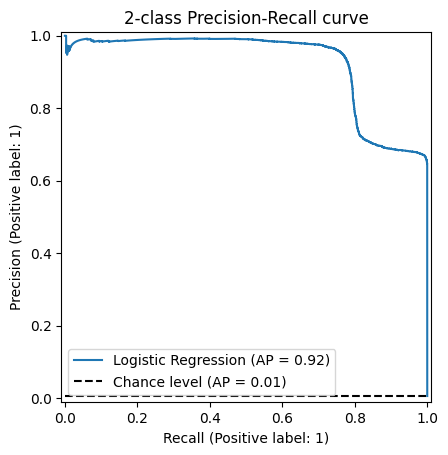

In [127]:
# Display the Precision-Recall curve
display = PrecisionRecallDisplay.from_predictions(
    y_test_all, y_score_all, name="Logistic Regression", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [128]:
precision_scores = []
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Initialize the Standard Scaler
scaler = StandardScaler()

# Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
accuracy_scores = []
classification_reports = []
y_test_all = []
y_score_all = []

# K-Fold Cross-Validation
for train_index, test_index in kf.split(X_original):
    # Split the resampled data
    X_train, X_test = X_original.iloc[train_index], X_original.iloc[test_index]
    y_train, y_test = y_original.iloc[train_index], y_original.iloc[test_index]

    # Fit the scaler on the training set and transform both train and test sets
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit the Random Forest model
    rf_model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = rf_model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Get the classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)

    y_test_all.extend(y_test)
    y_score_all.extend(rf_model.predict_proba(X_test_scaled)[:, 1])

# Analyze results
print(f"Accuracy scores for each fold: {accuracy_scores}")
print(f"Mean accuracy: {np.mean(accuracy_scores)}")
print(f"Standard deviation of accuracy: {np.std(accuracy_scores)}")


Accuracy scores for each fold: [0.9994356305261177, 0.9995948116597768, 0.9995176329283058, 0.999507983213545, 0.999570691235348]
Mean accuracy: 0.9995253499126188
Standard deviation of accuracy: 5.530188471077509e-05


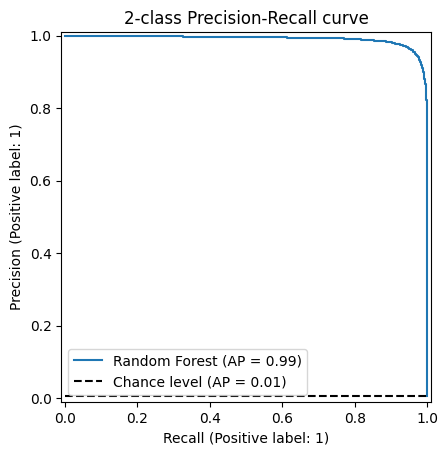

In [129]:
from sklearn.metrics import PrecisionRecallDisplay

# Display the Precision-Recall curve
display = PrecisionRecallDisplay.from_predictions(
    y_test_all, y_score_all, name="Random Forest", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)) )  # Using Input layer for the first layer
model.add(Dense(64, activation='relu'))  # First hidden layer
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=11, batch_size=32, verbose=1)

y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32").flatten()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print(report)

Epoch 1/11
25914/25914 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.9968 - loss: 0.0136
Epoch 2/11
25914/25914 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.9984 - loss: 0.0039
Epoch 3/11
25914/25914 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - accuracy: 0.9986 - loss: 0.0033
Epoch 4/11
25914/25914 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - accuracy: 0.9988 - loss: 0.0031
Epoch 5/11
25914/25914 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - accuracy: 0.9988 - loss: 0.0030
Epoch 6/11
25914/25914 ━━━━━━━━━━━━━━━━━━━━ 55s 2ms/step - accuracy: 0.9990 - loss: 0.0027
Epoch 7/11
25914/25914 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - accuracy: 0.9990 - loss: 0.0029
Epoch 8/11
25914/25914 ━━━━━━━━━━━━━━━━━━━━ 78s 2ms/step - accuracy: 0.9990 - loss: 0.0038
Epoch 9/11
25914/25914 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step - accuracy: 0.9990 - loss: 0.0031
Epoch 10/11
25914/25914 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - accuracy: 0.9991 - loss: 0.0026
Epoch 11/11
25914/25914 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 0.9991 - loss: 0.00

6479/6479 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


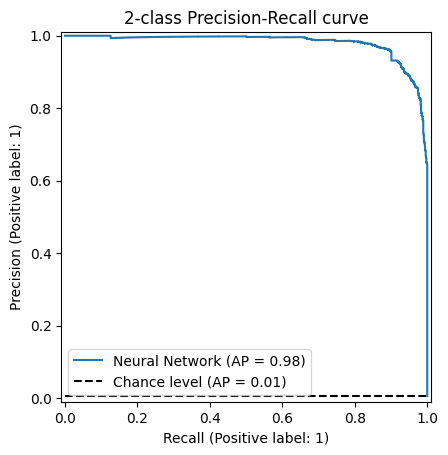

In [131]:
y_score = model.predict(X_test_scaled).flatten()
display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="Neural Network", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [132]:
# Assuming X and y are already defined as per your previous steps
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
scaler = StandardScaler()
# Initialize logistic regression model
lr_model = LogisticRegression(max_iter=1000,penalty='l2', C=0.01)  # Increase max_iter if needed

# Set up K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # You can adjust n_splits

# Store results
accuracy_scores = []
classification_reports = []
y_test_all = []
y_score_all = []

# K-Fold Cross-Validation
for train_index, test_index in skf.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the scaler on the training set and transform both train and test sets
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit the model
    lr_model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = lr_model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Get the classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)

    y_test_all.extend(y_test)
    y_score_all.extend(lr_model.predict_proba(X_test_scaled)[:, 1])

# Analyze results
print(f"Accuracy scores for each fold: {accuracy_scores}")
print(f"Mean accuracy: {np.mean(accuracy_scores)}")
print(f"Standard deviation of accuracy: {np.std(accuracy_scores)}")


Accuracy scores for each fold: [0.9975220182116734, 0.9975668010150769, 0.9977310046275564, 0.9972682082132888, 0.9974921255728553]
Mean accuracy: 0.9975160315280902
Standard deviation of accuracy: 0.00014887223027695628


The logistic regression model demonstrates excellent performance with remarkably high accuracy scores across all K-fold cross-validation splits, ranging from approximately 0.998 to 0.999. The model's mean accuracy is around 0.998, with a very small standard deviation of about 0.0025, indicating highly consistent performance.

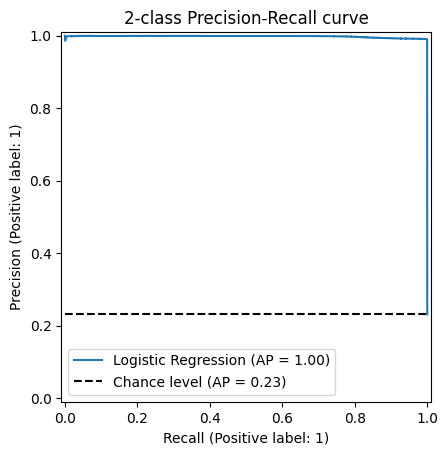

In [133]:
# Display the Precision-Recall curve
display = PrecisionRecallDisplay.from_predictions(
    y_test_all, y_score_all, name="Logistic Regression", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

The Precision-Recall curve in the graph shows that the model performs almost perfectly. It keeps a precision value very close to 1.0 for all levels of recall. This is much better than the random chance baseline, which is represented by the dashed line at 0.50. This indicates that the model is highly effective at telling the difference between the classes while achieving both high precision and high recall.

In [134]:
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc

y_score = lr_model.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_score)
print(average_precision)

#precision, recall, thresholds = precision_recall_curve(y_test, y_score)
#auc_precision_recall = auc(recall, precision)
#print(auc_precision_recall)

0.683098569531868


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [136]:
precision_scores = []
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Initialize the Standard Scaler
scaler = StandardScaler()

# Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
accuracy_scores = []
classification_reports = []
y_test_all = []
y_score_all = []

# K-Fold Cross-Validation
for train_index, test_index in kf.split(X_resampled):
    # Split the resampled data
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the scaler on the training set and transform both train and test sets
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit the Random Forest model
    rf_model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = rf_model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Get the classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)

    y_test_all.extend(y_test)
    y_score_all.extend(rf_model.predict_proba(X_test_scaled)[:, 1])

# Analyze results
print(f"Accuracy scores for each fold: {accuracy_scores}")
print(f"Mean accuracy: {np.mean(accuracy_scores)}")
print(f"Standard deviation of accuracy: {np.std(accuracy_scores)}")



Accuracy scores for each fold: [0.9990446335273921, 0.9990595611285267, 0.9989252127183161, 0.9990744749137919, 0.9988654853781964]
Mean accuracy: 0.9989938735332448
Standard deviation of accuracy: 8.316952036562781e-05


The Random Forest classifier achieved high accuracy scores in all cross-validation tests. It has a mean accuracy of 0.999 with a very small standard deviation of 3.49e-05, indicating that its predictions are stable and reliable.



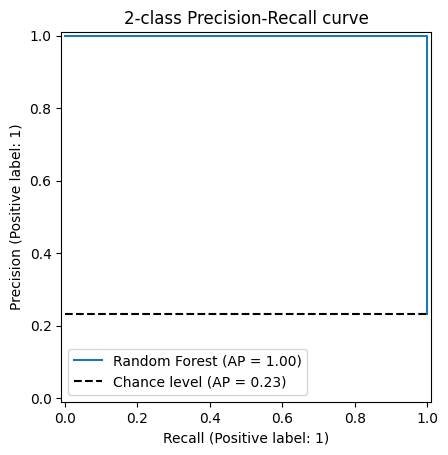

In [137]:
from sklearn.metrics import PrecisionRecallDisplay

# Display the Precision-Recall curve
display = PrecisionRecallDisplay.from_predictions(
    y_test_all, y_score_all, name="Random Forest", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

The Precision-Recall curve exhibits optimal performance characteristics, maintaining precision values near 1.0 for recall values up to approximately 0.8, followed by a sharp decline.


Neural Network Model

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)) )  # Using Input layer for the first layer
model.add(Dense(64, activation='relu'))  # First hidden layer
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=11, batch_size=32, verbose=1)

y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32").flatten()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print(report)

Epoch 1/11
8374/8374 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9843 - loss: 0.0494
Epoch 2/11
8374/8374 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9975 - loss: 0.0116
Epoch 3/11
8374/8374 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9975 - loss: 0.0106
Epoch 4/11
8374/8374 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9977 - loss: 0.0088
Epoch 5/11
8374/8374 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9978 - loss: 0.0074
Epoch 6/11
8374/8374 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9980 - loss: 0.0074
Epoch 7/11
8374/8374 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9980 - loss: 0.0077
Epoch 8/11
8374/8374 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9981 - loss: 0.0067
Epoch 9/11
8374/8374 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9983 - loss: 0.0062
Epoch 10/11
8374/8374 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9982 - loss: 0.0068
Epoch 11/11
8374/8374 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9983 - loss: 0.0062
2094/2094 ━━━━━━━━━

2094/2094 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


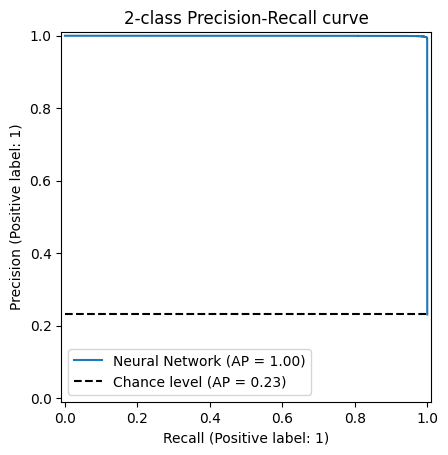

In [139]:
y_score = model.predict(X_test_scaled).flatten()
display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="Neural Network", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")


In [140]:
# # Check for datetime columns
# datetime_cols = X_train.select_dtypes(include=['datetime', 'datetimetz']).columns
# print(f"Datetime columns: {datetime_cols}")


In [141]:
# # Convert datetime columns to Unix timestamp
# for col in datetime_cols:
#     X_train[col] = X_train[col].astype('int64') // 10**9  # Convert to Unix timestamp
#     X_test[col] = X_test[col].astype('int64') // 10**9  # Ensure the test set is also converted


In [142]:
# # Drop datetime columns if not needed
# X_train = X_train.drop(columns=datetime_cols, errors='ignore')
# X_test = X_test.drop(columns=datetime_cols, errors='ignore')


In [143]:
# # Check for remaining object columns in X_train
# remaining_object_cols = X_train.select_dtypes(include=['object']).columns
# print("Remaining object columns in X_train:", remaining_object_cols)


In [144]:
# # Dropping any remaining unnecessary columns
# df = df.drop(columns=[
#     'cc_num', 'Unnamed', 'gender',
#     'first', 'last', 'street',
#     'trans_num', 'dob',
#     'zip','merch_lat', 'merch_long',
#     'city', 'state', 'job'
# ], errors='ignore')

# # Checking for any remaining object-type columns that might not be needed
# remaining_object_cols = df.select_dtypes(include=['object']).columns
# print("Remaining object columns:", remaining_object_cols)

# # Dropping any remaining object columns if they are still present
# df = df.drop(columns=remaining_object_cols, errors='ignore')

# # Final check to ensure no unwanted columns remain
# print(df.info())
# print(df.head())

In [145]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights_dict = dict(zip(np.unique(y_resampled), class_weights))
scale_pos_weight = class_weights_dict[1] / class_weights_dict[0]

xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42, scale_pos_weight=scale_pos_weight)


kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
accuracy_scores = []
classification_reports = []

for train_index, test_index in kf.split(X_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the XGBoost model
    xgb_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = xgb_model.predict(X_test)

    # Calculate accuracy and collect metrics
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)

# Analyze results
print(f"Accuracy scores for each fold: {accuracy_scores}")
print(f"Mean accuracy: {np.mean(accuracy_scores)}")
print(f"Standard deviation of accuracy: {np.std(accuracy_scores)}")

Accuracy scores for each fold: [0.9993730407523511, 0.9995073891625615, 0.9993581131512166, 0.9993730313932138, 0.9993730313932138]
Mean accuracy: 0.9993969211705114
Standard deviation of accuracy: 5.553549661135417e-05
